In [146]:

import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import hvplot.pandas

In [147]:
df = pd.read_csv("Dataset.csv")
df.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [148]:
# Use info to provide a concise summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [149]:
# Checks the number of unique and distinct values in dataframe
print(df.nunique())

YEAR                            19
LocationAbbr                    50
LocationDesc                    50
TopicType                        1
TopicDesc                        3
MeasureDesc                      4
DataSource                       2
Response                         3
Data_Value_Unit                  1
Data_Value_Type                  1
Data_Value                     750
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
Data_Value_Std_Err             111
Low_Confidence_Limit           688
High_Confidence_Limit          844
Sample_Size                   2625
Gender                           3
Race                             1
Age                              1
Education                        2
GeoLocation                     50
TopicTypeId                      1
TopicId                          3
MeasureId                        4
StratificationID1                3
StratificationID2                1
StratificationID3                1
StratificationID4   

In [150]:
# Checks statistical summary of dataframe
df.describe()

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10600.000000,10080.000000,10080.000000,10083.000000,10080.000000,10080.000000,10600.000000
mean,2007.053491,20.336806,1.851429,16.715253,23.961806,1483.412897,8.106887
std,5.462656,21.168271,1.777441,18.575128,23.981915,2189.565233,3.076806
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.000000,0.600000,1.700000,4.300000,671.000000,7.000000
50%,2006.000000,10.550000,1.300000,7.900000,13.200000,1001.000000,9.000000
75%,2011.000000,36.425000,2.400000,29.600000,42.500000,1642.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


In [151]:
# Removes duplicate data

df.drop_duplicates(keep='first', inplace=True)

# There's no duplicate data after running df.info()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [153]:
df[df.isnull().all(axis=1)]

# There are no rows of missing values since the number of rows is zero

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder


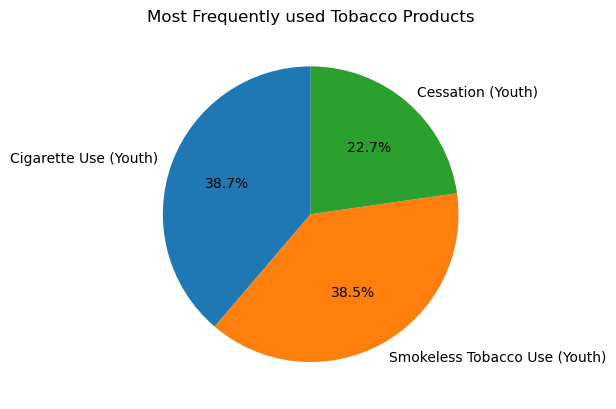

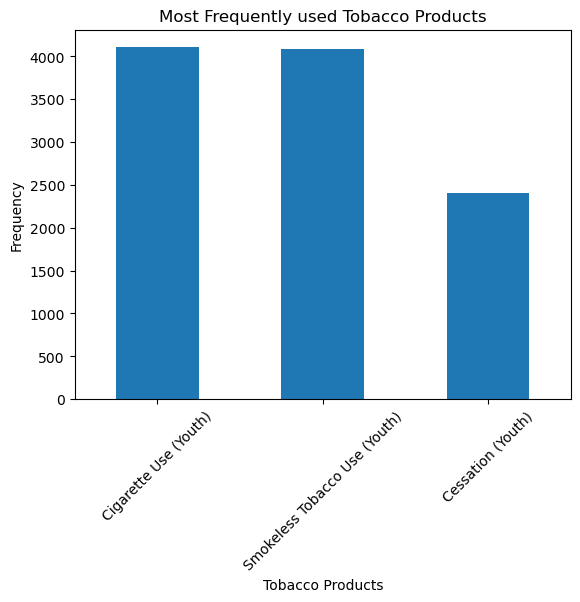

The most frequently used tobacco products amongst young people is Cigarettes


In [154]:
# What are the most frequently used tobacco products among young people?

category_counts = df['TopicDesc'].value_counts()


plt.figure(figure=(8, 6))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Most Frequently used Tobacco Products")
plt.ylabel('')
plt.show()

plt.figure(figure=(8, 6))
category_counts.plot(kind='bar')
plt.title("Most Frequently used Tobacco Products")
plt.ylabel('Frequency')
plt.xlabel('Tobacco Products')
plt.xticks(rotation=45)
plt.show()


print("The most frequently used tobacco products amongst young people is Cigarettes")

In [160]:



display(middle_school_df['Education'])
display(df['Education'])

0        Middle School
3        Middle School
6        Middle School
7        Middle School
8        Middle School
             ...      
10589    Middle School
10590    Middle School
10595    Middle School
10597    Middle School
10598    Middle School
Name: Education, Length: 5633, dtype: object

0        Middle School
1          High School
2          High School
3        Middle School
4          High School
             ...      
10595    Middle School
10596      High School
10597    Middle School
10598    Middle School
10599      High School
Name: Education, Length: 10600, dtype: object

In [156]:
middle_school_df=df[df["Education"]=='Middle School']
middle_school_df
middle_school_df['Education']
middle_school_df['YEAR']==2002
year_plus_school_df=middle_school_df[middle_school_df["YEAR"]==2002]
year_plus_school_df
year_plus_school_df['LocationAbbr'].value_counts()



LocationAbbr
MN    24
WV    24
DE    24
VT    24
TN    24
MD    24
AL    24
PA    24
CT    24
IL    24
FL    24
NE    24
OH    24
KS    24
OK    24
MA    24
GU    24
NC    24
WI    24
IA    24
KY    21
NY    21
MS    21
US     1
Name: count, dtype: int64

In [157]:
  
year_check_df= df[df["YEAR"]==2002]
year_check_df
year_check_df["Education"]


12       Middle School
20         High School
29       Middle School
30       Middle School
37       Middle School
             ...      
10554      High School
10571    Middle School
10581      High School
10587    Middle School
10595    Middle School
Name: Education, Length: 1016, dtype: object

In [158]:
# Geographic: is there a correlation between state and reduced rates of youth tobacco usage?

#columns_list = ['LocationDesc', 'TopicDesc']

#categorical_df = df[columns_list]

#df_encoded = pd.get_dummies(categorical_df)

#scaler = StandardScaler()

#f_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

#correlation_matrix = df_scaled.corr()

#print(correlation_matrix)

                                         LocationDesc_Alabama  \
LocationDesc_Alabama                                 1.000000   
LocationDesc_Arizona                                -0.032703   
LocationDesc_Arkansas                               -0.029091   
LocationDesc_California                             -0.019562   
LocationDesc_Colorado                               -0.013801   
LocationDesc_Connecticut                            -0.040784   
LocationDesc_Delaware                               -0.038035   
LocationDesc_District of Columbia                   -0.013801   
LocationDesc_Florida                                -0.019562   
LocationDesc_Georgia                                -0.035101   
LocationDesc_Guam                                   -0.013801   
LocationDesc_Hawaii                                 -0.035635   
LocationDesc_Idaho                                  -0.013801   
LocationDesc_Illinois                               -0.033829   
LocationDesc_Indiana     